In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
import random

accidents = pd.read_csv("accident_update.csv")
plt.style.use('cyberpunk')

In [26]:
selRows = accidents[accidents['Time'].isna()].index
accidents = accidents.drop(selRows, axis=0)
accidents['Time'] = pd.to_datetime(accidents['Time'], format='%H:%M')
accidents['Hour'] = accidents['Time'].dt.hour

accidents['Month'] = pd.DatetimeIndex(accidents['Date']).month

/Users/tastebread/miniforge3/envs/rena/lib/python3.8/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '13/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/tastebread/miniforge3/envs/rena/lib/python3.8/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '14/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/tastebread/miniforge3/envs/rena/lib/python3.8/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '15/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/tastebread/miniforge3/envs/rena/lib/python3.8/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '16/01/

In [53]:
print(accidents.columns)

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year', 'Hour', 'Month'],
      dtype='object')


1.Accident_Index : 사고 
2.Location_Easting_OSGR : 위치 (동쪽)
3.Location_Northing_OSGR : 위치 (남쪽)
4.Longitude : 경도
5.Latitude : 위도
6.Police_Force : 경찰
7.Accident_Severity : 사고 심각도
8.Number_of_Vehicles : 차량 수
9.Number_of_casualties : 사상자 수
10.Date : 날짜
11.Day_of_week : 일주일동안 의 일
12.Time : 시간
13.Local_Authority_(District) : 구역
14.Local_Authority_(Highway) : 고속도로
15.1st_Road_Class : 
16.1st_Road_Number : 
17.Road_Type : 도로형식
18.Speed_limit : 속도 한계
19.Junction_Detail : 접속 상세
20.Junction_Control : 접합 제어
21.2nd_Road_Class : 
22.2nd_Road_Number :
23.Pedestrian_Crossing-Human_Control : 보행자 도로 
24.Pedestrian_Crossing-Physical_Facilities : 보행자 물리적 시설
25.Light_Conditions : 조명 조건
26.Weather_Conditions : 날씨 조건
27.Road_Surface_Conditions : 도로 표면 조건
28.Special_Conditions_at_Site : 특수 조건
29.Carriageway_Hazards :차도 위험
30.Urban_or_Rural_Area : 도시 or 농촌 지역
31.Did_Police_Officer_Attend_Scene_of_Accident :
32.LSOA_of_Accident_Location :
33.Year : 연도

In [27]:
#각 컬럼의 열측값을 리스트 형식으로 나타내기 (데이터 프레임 형태로))
def missings_col(df):
    labels,values = list(),list()
    if df.isna().sum().sum() >0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column])*100))
        missings=pd.DataFrame({'Features':labels, 'MissingPercent':values}).sort_values(by='MissingPercent',ascending=False)
        return missings
    else:
        return False
                
missings_col(accidents)

,Features,MissingPercent
10,Did_Police_Officer_Attend_Scene_of_Accident,0.194211
7,Road_Surface_Conditions,0.129917
6,Weather_Conditions,0.008377
0,Location_Easting_OSGR,0.006715
1,Location_Northing_OSGR,0.006715
2,Longitude,0.006715
3,Latitude,0.006715
5,Pedestrian_Crossing-Physical_Facilities,0.002194
9,Carriageway_Hazards,0.001862
4,Pedestrian_Crossing-Human_Control,0.001064


In [28]:
#년도(year) int형으로 변경 , 요일을 숫자로 변환 (perdow), 월별을 숫자로 표현

accidents_year = {}

years = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
for year in years:
    accidents_year[year] = accidents[accidents['Year']==int(year)]
    
accidents_dow = {}

dow = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}

for key in dow:
    accidents_dow[dow[key]] = accidents[accidents['Day_of_Week']==key]
    
months = {1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Ag',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [29]:
print("Before : ",accidents_year['2007']['Month'].unique())

accidents_year['2007'] = accidents_year['2007'].sort_values('Month')
print("After : ", accidents_year['2007']['Month'].unique())

Before :  [ 5  2  8  3  9 10 12  1 11  6  7  4]
After :  [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [30]:
print(accidents.columns)

print(accidents['Date'])
print(accidents['Day_of_Week'])
print(accidents['Month'])
print(accidents['Time'])

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year', 'Hour', 'Month'],
      dtype='object')
0          04/01/2005
1          05/01/2005
2          06/01/2005
3          07/01/2005
4          10/01/2005
              ...    
1504145    07/12/2014
1504146    11/12/2014
1504147    09/12/2014
1504148    17/1

In [31]:
print(accidents['Year'].value_counts())

2005    198706
2006    189143
2007    182095
2012    179710
2009    163537
2010    154406
2011    151462
2014    146322
2013    138652
Name: Year, dtype: int64


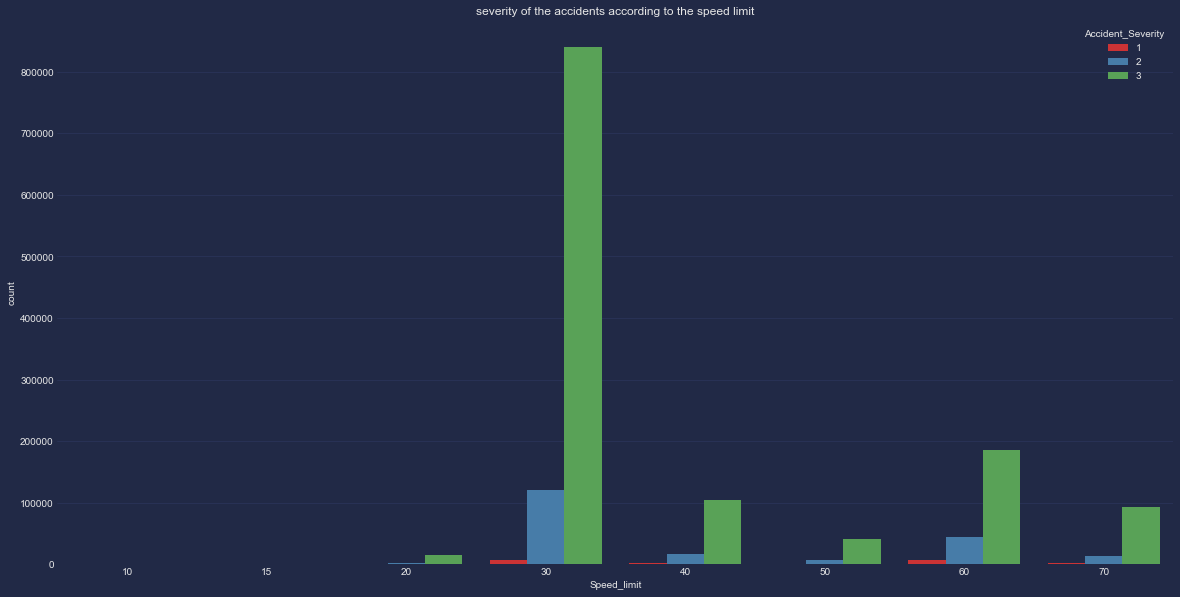

In [32]:
#속도에 따른 사고 심각도
plt.figure(figsize=(20,10))
sns.countplot(x='Speed_limit', hue='Accident_Severity', data=accidents, palette='Set1')
plt.title("severity of the accidents according to the speed limit")

plt.savefig("speed-accident_severity.png")

Mean : 167114.78 std : 21000.26


'\n그래프를 통해 알수 있는 사실\n1.2005~2014 까지의 평균 교통사고는 167.114 이다, 표준편차는 : 21000\n2.2005~2011 까지 감소추세를 보였지만 드물게 2012년에 증가하고 그이후부터 다시 감소추세를 보인다\n\n'

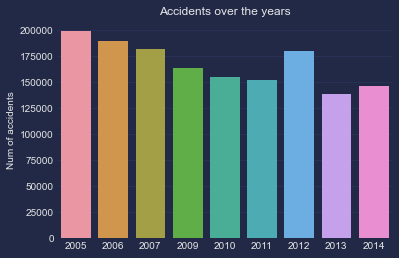

In [33]:
#년도에 따른 사고 횟수

sns.barplot(x=accidents.Year.value_counts().index,y=accidents.Year.value_counts())
plt.ylabel('Num of accidents')
plt.title('Accidents over the years')

plt.savefig('accidents_year.png')

print("Mean : {:.2f} std : {:.2f}".format(accidents.Year.value_counts().mean(),accidents.Year.value_counts().std()))

"""
그래프를 통해 알수 있는 사실
1.2005~2014 까지의 평균 교통사고는 167.114 이다, 표준편차는 : 21000
2.2005~2011 까지 감소추세를 보였지만 드물게 2012년에 증가하고 그이후부터 다시 감소추세를 보인다

"""

/var/folders/xg/ygt1lc156px50m3tv0h1yd2m0000gn/T/ipykernel_36982/911884534.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


'\n각년도를 월별로 나타낸 그래프이다\n1.2012년에 특히 사고가 많이 일어났다\n2.어느년도이든 10월 11월에 교통사고량이 대체적으로 많다\n'

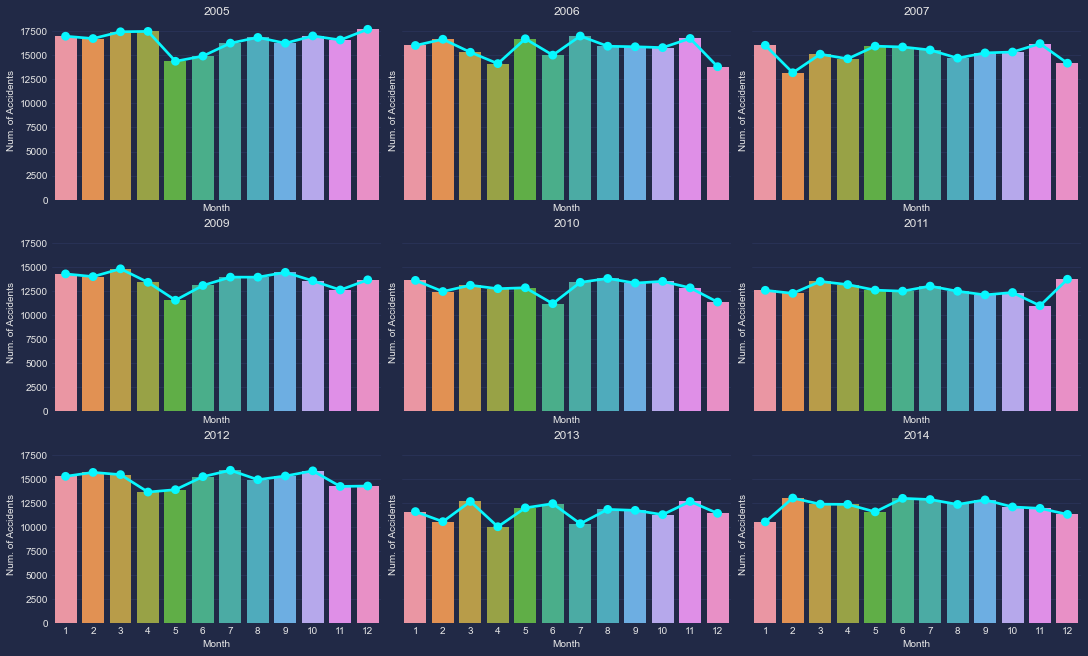

In [34]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, constrained_layout=True, figsize=(15,9))
year = 2004

for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        year += 1
        if year == 2008: year = 2009
        sns.barplot(ax=axs[row][col],x=accidents_year[str(year)]["Month"].unique(),
                    y=accidents_year[str(year)].groupby("Month")["Year"].count())
        sns.pointplot(ax=axs[row][col],x=accidents_year[str(year)]["Month"].unique(),
                     y=accidents_year[str(year)].groupby("Month")["Year"].count())
        axs[row][col].set_ylabel("Num. of Accidents")
        axs[row][col].set_xlabel("Month")
        axs[row][col].set_title(str(year))
fig.savefig('accidents_month.png')
fig.show()

"""
각년도를 월별로 나타낸 그래프이다
1.2012년에 특히 사고가 많이 일어났다
2.어느년도이든 10월 11월에 교통사고량이 대체적으로 많다
"""

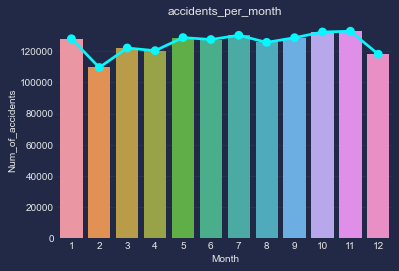

Mean : 125336.08 Std : 6746.97


,Num_of_accidents
Month,
1,127992
2,109558
3,122073
4,120350
5,128752
6,127514
7,130208
8,125678
9,128673


In [35]:
#2005~2014 평균 월별로 일어나는 교통사고 횟수를 계산

accidents_month = pd.DataFrame(accidents.groupby('Month')['Year'].count())
accidents_month = accidents_month.rename({'Year':'Num_of_accidents'}, axis=1)

sns.barplot(x=accidents_month.index,y=accidents_month['Num_of_accidents'])
sns.pointplot(x=accidents_month.index, y=accidents_month['Num_of_accidents'])
plt.title('accidents_per_month')
plt.savefig('accidents_per_month.png')
plt.show()

print('Mean : {:.2f} Std : {:.2f}'.format(float(accidents_month.mean().unique()), float(accidents_month.std().unique())))
accidents_month

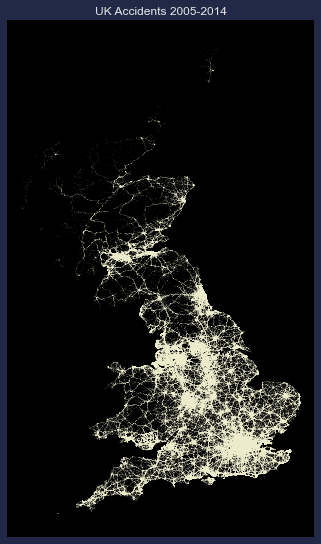

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(5.5,9.5))
plt.axes().set_facecolor("black")
plt.scatter(x = accidents["Longitude"], y = accidents["Latitude"],s=0.005, alpha= 0.25, color="lightyellow")
plt.title("UK Accidents 2005-2014")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()
plt.savefig('map.png')

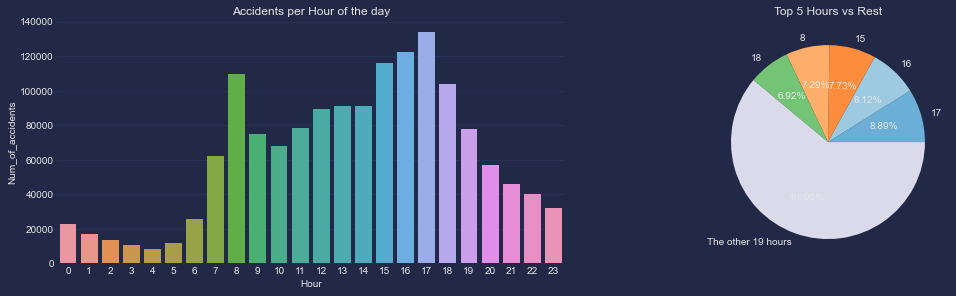


Mean:62668.04   Standard Deviation:39443.85

      Num_of_accidents
Hour                  
17              133739
16              122131
15              116266
8               109622
18              104085 



Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Num_of_accidents,23025,16890,13618,10827,8347,12035,25832,62374,109622,74901,...,91262,116266,122131,133739,104085,77728,57216,45749,39891,31878


<Figure size 432x288 with 0 Axes>

In [40]:
#하루당 사고수 나타내기

"""
대부분의 사고는 교통량이 많은 낮 시간에 발생한다. 
자세히 살펴보면 상위 3시간과 상위 5시간이 15:00 - 18:59 사이임을 알 수 있습니다. 상위 4명은 8:00 - 8:59입니다. 
이 5시간이 사고의 거의 40%를 차지한다.

또한 시간당 평균 사고 값은 62,659.96이고 표준 편차는 39,438.75입니다. 분명히, 다른 달들 사이에 있는 것보다 훨씬 더 많은 분산 분포가 있다.
"""

df = pd.DataFrame(accidents.groupby("Hour")["Year"].count())
df = df.rename({"Year":"Num_of_accidents"}, axis=1)
top5hours = pd.DataFrame(df["Num_of_accidents"].nlargest(5))
elsehours = pd.DataFrame(data = {'Hour':'The other 19 hours',
                                 'Num_of_accidents':[df["Num_of_accidents"].nsmallest(19).sum()]})

elsehours.set_index("Hour", inplace=True)
topvsothers = pd.concat([top5hours, elsehours])


fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,4))

sns.barplot(ax=axs[0], x = df.index, y = df["Num_of_accidents"])
axs[0].set_title("Accidents per Hour of the day")

cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([1, 2, 5, 6, 9,15]))
axs[1].pie(topvsothers["Num_of_accidents"], labels=topvsothers.index, autopct='%1.2f%%',colors=colors)
axs[1].set_title("Top 5 Hours vs Rest")

plt.show()
plt.savefig("topvsothers.png")

print("\nMean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(df.mean().unique()), float(df.std().unique())))
print(top5hours, "\n")
df.T

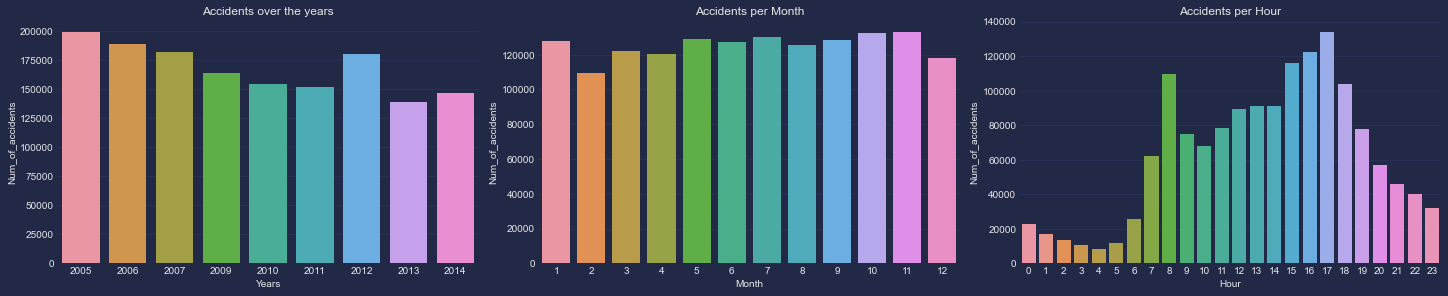


YEARLY - Mean:167114.78   Standard Deviation:21000.26

MONTHLY - Mean:125336.08   Standard Deviation:6746.97

HOURLY - Mean:62668.04   Standard Deviation:39443.85



<Figure size 432x288 with 0 Axes>

In [41]:
#대부분의 자동차 사고는 언제 일어나는가?

"""
연도별 하락 추세(2012년 예외). 대부분의 사고는 11월과 10월에 발생하며, 15:00 - 18:59와 8:00 - 8:59에 발생한다.
"""
fig, axs = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(20,4))

sns.barplot(ax=axs[0], x=accidents.Year.value_counts().index,y=accidents.Year.value_counts())
axs[0].set_ylabel("Num_of_accidents")
axs[0].set_xlabel("Years")
axs[0].set_title("Accidents over the years")

sns.barplot(ax=axs[1], x = accidents_month.index, y = accidents_month["Num_of_accidents"])
axs[1].set_title("Accidents per Month")

sns.barplot(ax=axs[2], x = df.index, y = df["Num_of_accidents"])
axs[2].set_title("Accidents per Hour")

plt.show()
plt.savefig("accidents_per_hour.png")
print("\nYEARLY - Mean:{:.2f}   Standard Deviation:{:.2f}".format(accidents.Year.value_counts().mean(), 
                                                                  accidents.Year.value_counts().std()))
print("\nMONTHLY - Mean:{:.2f}   Standard Deviation:{:.2f}".format(float(accidents_month.mean().unique()),
                                                                    float(accidents_month.std().unique())))
print("\nHOURLY - Mean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(df.mean().unique()), float(df.std().unique())))



#Num_of_accidents"

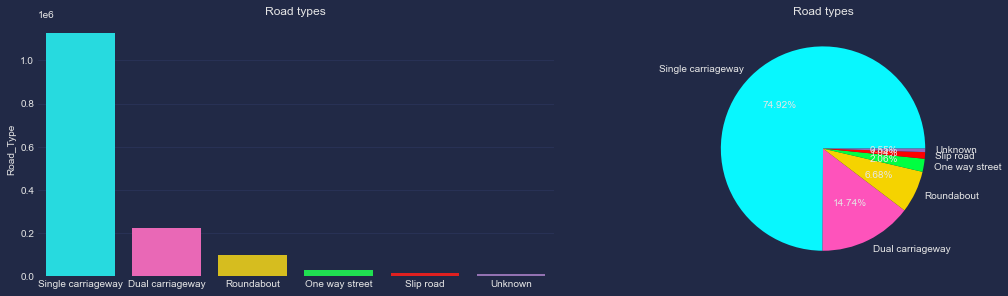

<Figure size 432x288 with 0 Axes>

In [43]:
#도로 상태가 사고에 어떤 영향을 미치는가?

"""
단일 차로는 사고가 가장 많은 도로 형태이다. 
그래도 주변에서 사고가 많이 나는 것 같다
"""

fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,4))
road = accidents["Road_Type"].value_counts()

sns.barplot(ax=axs[0], x = road.index, y = road)
axs[0].set_title("Road types")

axs[1].pie(road, labels=road.index, autopct='%1.2f%%')
axs[1].set_title("Road types")

plt.show()
plt.savefig("rod_type.png")

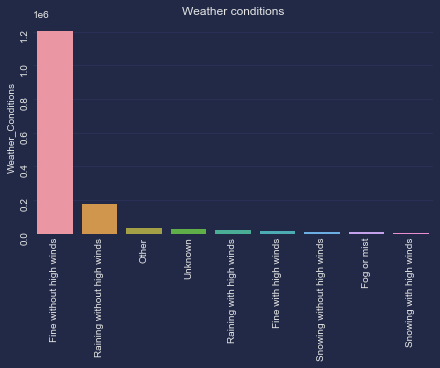

Fine without high winds       1203857
Raining without high winds     177651
Other                           33499
Unknown                         28286
Raining with high winds         20811
Fine with high winds            18354
Snowing without high winds      11301
Fog or mist                      8188
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

<Figure size 432x288 with 0 Axes>

In [44]:
#기상조건이 도로에 미치는 영향
"""
우리는 비가 오거나 강풍이 불었던 시간을 정확히 알지 못하기 때문에, 우리는 주어진 기상 조건이 사고에 큰 영향을 미치는지 아닌지 정말로 구별할 수 없다.
"""

fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))
weather = accidents["Weather_Conditions"].value_counts()

sns.barplot(ax=axs, x = weather.index, y = weather)
axs.set_title("Weather conditions")
axs.tick_params(labelrotation=90)


plt.show()
plt.savefig("weather.png")
weather

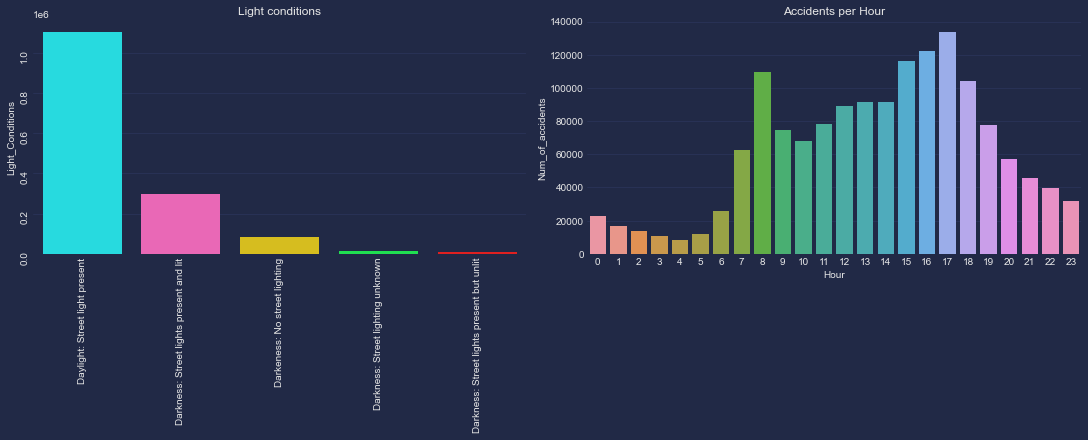

Daylight: Street light present               1102152
Darkness: Street lights present and lit       296314
Darkeness: No street lighting                  82548
Darkness: Street lighting unknown              16113
Darkness: Street lights present but unlit       6906
Name: Light_Conditions, dtype: int64

<Figure size 432x288 with 0 Axes>

In [45]:
#조도 조건

"""
여기서도 우리는 대부분의 사고가 낮 동안, 낮과 함께 일어난다는 것을 알 수 있다. 
그러나 사고와의 상관관계를 찾기 위해서는 각 조건에서 총 주행 횟수가 필요하다.
"""
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,6))
light = accidents["Light_Conditions"].value_counts()

sns.barplot(ax=axs[0], x = light.index, y = light)
axs[0].set_title("Light conditions")
axs[0].tick_params(labelrotation=90)

sns.barplot(ax=axs[1], x = df.index, y = df["Num_of_accidents"])
axs[1].set_title("Accidents per Hour")

plt.show()
plt.savefig('light_con.png')
light

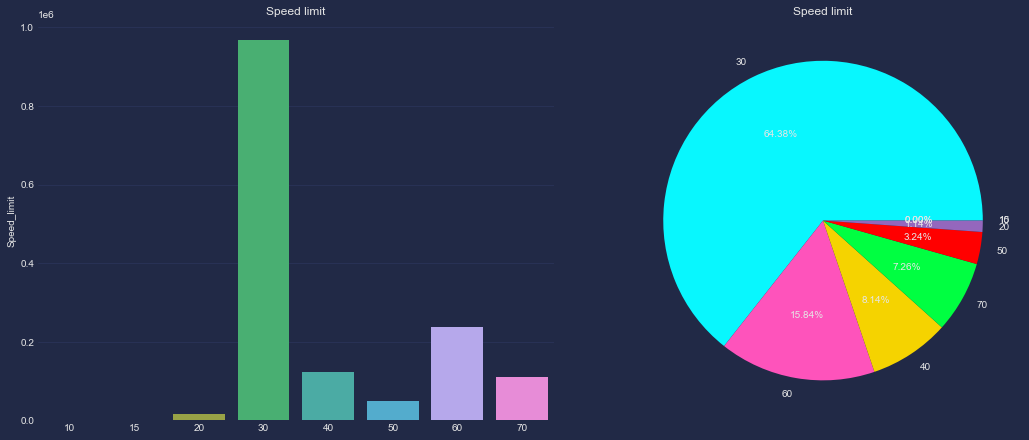

30    968223
60    238191
40    122390
70    109262
50     48789
20     17154
10        14
15        10
Name: Speed_limit, dtype: int64

<Figure size 432x288 with 0 Axes>

In [46]:
#자동차 속력에 대한 상세한 조건

"""
시속 30마일 도로 구간은 더 많은 사고가 발생했다

참고: 1mph = 1.60934km/h
"""
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,6))
speed = accidents["Speed_limit"].value_counts()

sns.barplot(ax=axs[0], x = speed.index, y = speed)
axs[0].set_title("Speed limit")

axs[1].pie(speed, labels=speed.index, autopct='%1.2f%%')
axs[1].set_title("Speed limit")

plt.show()
plt.savefig("spped_limit2.png")

speed